In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

FILE_PATH = "k_h_Comparing(1).csv" 


df  = pd.read_csv(FILE_PATH).drop(['Unnamed: 0'], axis = 1).reset_index(drop = True)

In [2]:
df

,k,h,2018-12-31 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,...,2023-12-14 00:00:00,2023-12-15 00:00:00,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00
0,1.0,1.0,0.0,0.0,-0.005213,-0.049628,-0.000760,-0.002266,0.001904,-0.002478,...,-0.002767,0.000563,-0.001390,-0.001482,-0.000541,-0.000025,0.002014,-0.000006,-0.000078,-0.001548
1,1.0,2.0,0.0,0.0,-0.005213,-0.038818,-0.001634,0.002584,0.001678,-0.001232,...,-0.007391,-0.000299,-0.002764,0.001059,0.001242,-0.000165,0.003044,-0.000392,-0.000942,-0.001414
2,1.0,3.0,0.0,0.0,-0.005213,-0.038818,0.006398,-0.003412,-0.004563,0.001346,...,-0.003269,0.000896,0.002845,-0.000032,0.001282,-0.001489,-0.001078,-0.000148,-0.000183,-0.000767
3,1.0,4.0,0.0,0.0,-0.005213,-0.038818,0.006398,0.000353,-0.002309,0.000350,...,0.000791,0.000922,-0.000337,0.000206,0.001590,0.000341,-0.000545,0.000077,0.000180,-0.000421
4,1.0,5.0,0.0,0.0,-0.005213,-0.038818,0.006398,0.000353,0.009925,-0.001787,...,-0.001724,0.001194,-0.001446,0.000456,0.000590,-0.000325,-0.001195,0.001113,0.000544,-0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0,6.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.002158,0.001223,-0.004619,0.001425,-0.000686,-0.001967,0.002559,0.000306,-0.001755,0.000743
96,10.0,7.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.003034,0.000685,-0.003616,0.001133,0.000691,-0.002236,0.001685,0.000206,-0.001740,0.001664
97,10.0,8.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.007913,-0.000256,-0.003100,0.000871,-0.000163,-0.001924,0.001509,-0.000156,-0.001727,0.001153
98,10.0,9.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.003359,0.001102,-0.004758,0.001505,0.000052,-0.001941,0.002521,0.000084,-0.002648,0.001545


In [3]:
def winrate(pnl, signal,h):
    win_count = lose_count = 0
    company = pnl.columns
    for oo in company:
        flag_h = 0
        for x in range(0,pnl.shape[1]):
            if flag_h != 0:
                flag_h = flag_h - 1
            if signal[oo].iloc[x] == 1:
                if pnl[oo].iloc[x + h -1] > 0: win_count = win_count + 1
                elif pnl[oo].iloc[x + h -1] < 0: lose_count = lose_count + 1
                flag_h = h - 1
            elif signal[oo].iloc[x] == -1:
                if pnl[oo].iloc[x + h -1] < 0: win_count = win_count + 1
                elif pnl[oo].iloc[x + h -1] > 0: lose_count = lose_count + 1
                flag_h = h - 1
    return win_count / (win_count + lose_count) *100

In [4]:
# for k in ["01","03","05","10","15","20","40"]:
#     for h in ["01","03","05","10","15","20","40"]:
#         pnl = pd.read_csv("Main File/TSMOM/Data/target_vol = 0.3/pnl/pnl (k = "+ str(k)+ ", h = " + str(h) + ").csv").set_index('Date')

#         signal = pd.read_csv("Main File/TSMOM/Data/target_vol = 0.3/signal/signal (k = "+ str(k)+ ", h = " + str(h) + ").csv").set_index('Date')

#         temp = winrate(pnl,signal, int(h))
#         try:
#             temp2 = [k,h,temp]
#             stats.loc[len(stats.index)] = temp2
#         except:
#             stats = pd.DataFrame(columns = ["k","h","winrate"])
#             temp2 = [k,h,temp]
#             stats.loc[len(stats.index)] = temp2



### Adding EU_stock for benchmark

In [5]:
import yfinance as yf

tolerance = 0.
k = 1
h = 1

# rule = 'BME'

time_range = '6mo' # khoảng thời gian làm backtest 
start_time = '2018-12-31'
end_time = '2023-12-31'


# Vol scaling
vol_flag = 0                  # Set flag to 1 for vol targeting
if vol_flag == 1:
    target_vol = 0.4 # Can be changed
else:
    target_vol = 'no target vol'


In [6]:
def EU_Index_data():

    stock_list =['^STOXX50E']
    futures = pd.DataFrame(columns= stock_list)

    time_index = list(yf.Ticker(stock_list[0]).history(period = 'max',start = start_time, end = end_time).index)
    flag = 0

    for symbol in stock_list:
        df = yf.Ticker(symbol).history(period = 'max', start = start_time, end = end_time)
        df = pd.DataFrame(df['Close'])
        i = 0
        daily_return = []
        for k in df['Close']:
            if i != 0:
                daily_return.append(float((k-i)/i))
            else:
                daily_return.append(float(0))
            i = k
        if time_index != list(df.index): flag +=1
        try:
            futures[symbol] = daily_return
        except:
            print(symbol)
            print(len(daily_return)) # Check differnet time index
            while len(daily_return) < len(futures):
                daily_return.insert(0,np.nan)
            futures[symbol] = daily_return

    futures.index = time_index
    futures = futures.iloc[1:, :]


    # print(flag) # Check differnet time index

    futures['Date'] = pd.to_datetime(futures.index, format='%Y-%m-%d')
    futures.set_index('Date', inplace=True)

    return futures

In [7]:
EU_50 = EU_Index_data().transpose()

In [8]:
EU_50.mean(axis=1)/EU_50.std(axis=1, ddof = 1)* np.sqrt(252)

^STOXX50E    0.511901
dtype: float64

In [9]:
def cummulative_returning(data):
    return  (data.iloc[:,2:] + 1).cumprod(axis = 1).iloc[:,-1]

def annualise_return(data):
    return (1 + cummulative_returning(data))**(252/ (data.shape[1] - 2)) - 1

def sharpe_ratio(df):
    result = []
    for x,v in enumerate(df.T):
        result.append(df.iloc[x][3 + int(df.iloc[x]['k']):].mean() / df.iloc[x][2 + int(df.iloc[x]['k']):].std(ddof = 1)* np.sqrt(252))
    return result

def maximum_drawdown(data):
    cumulative = (data.iloc[:,2:] + 1).cumprod(axis = 1)
    max_return = cumulative.cummax(axis = 1)
    return cumulative.sub(max_return).div(max_return).min(axis = 1)

def calmar_ratio(data):
    return annualise_return(data)/ -maximum_drawdown(data)

def sortino_ratio(data):
    k = data.iloc[:,2:] > 0
    x= data.iloc[:,2:]
    x[k] = 0.0
    x = np.square(x)
    x = np.nanmean(x, axis=1)
    x = np.sqrt(x) * np.sqrt(252)
    y = np.nanmean(data.iloc[:,2:], axis=1)
    return y/x * np.sqrt(252)

In [10]:
cummulative_return = (df.iloc[:,2:] + 1).cumprod(axis = 1)

cummulative_return.columns = pd.to_datetime(cummulative_return.columns)

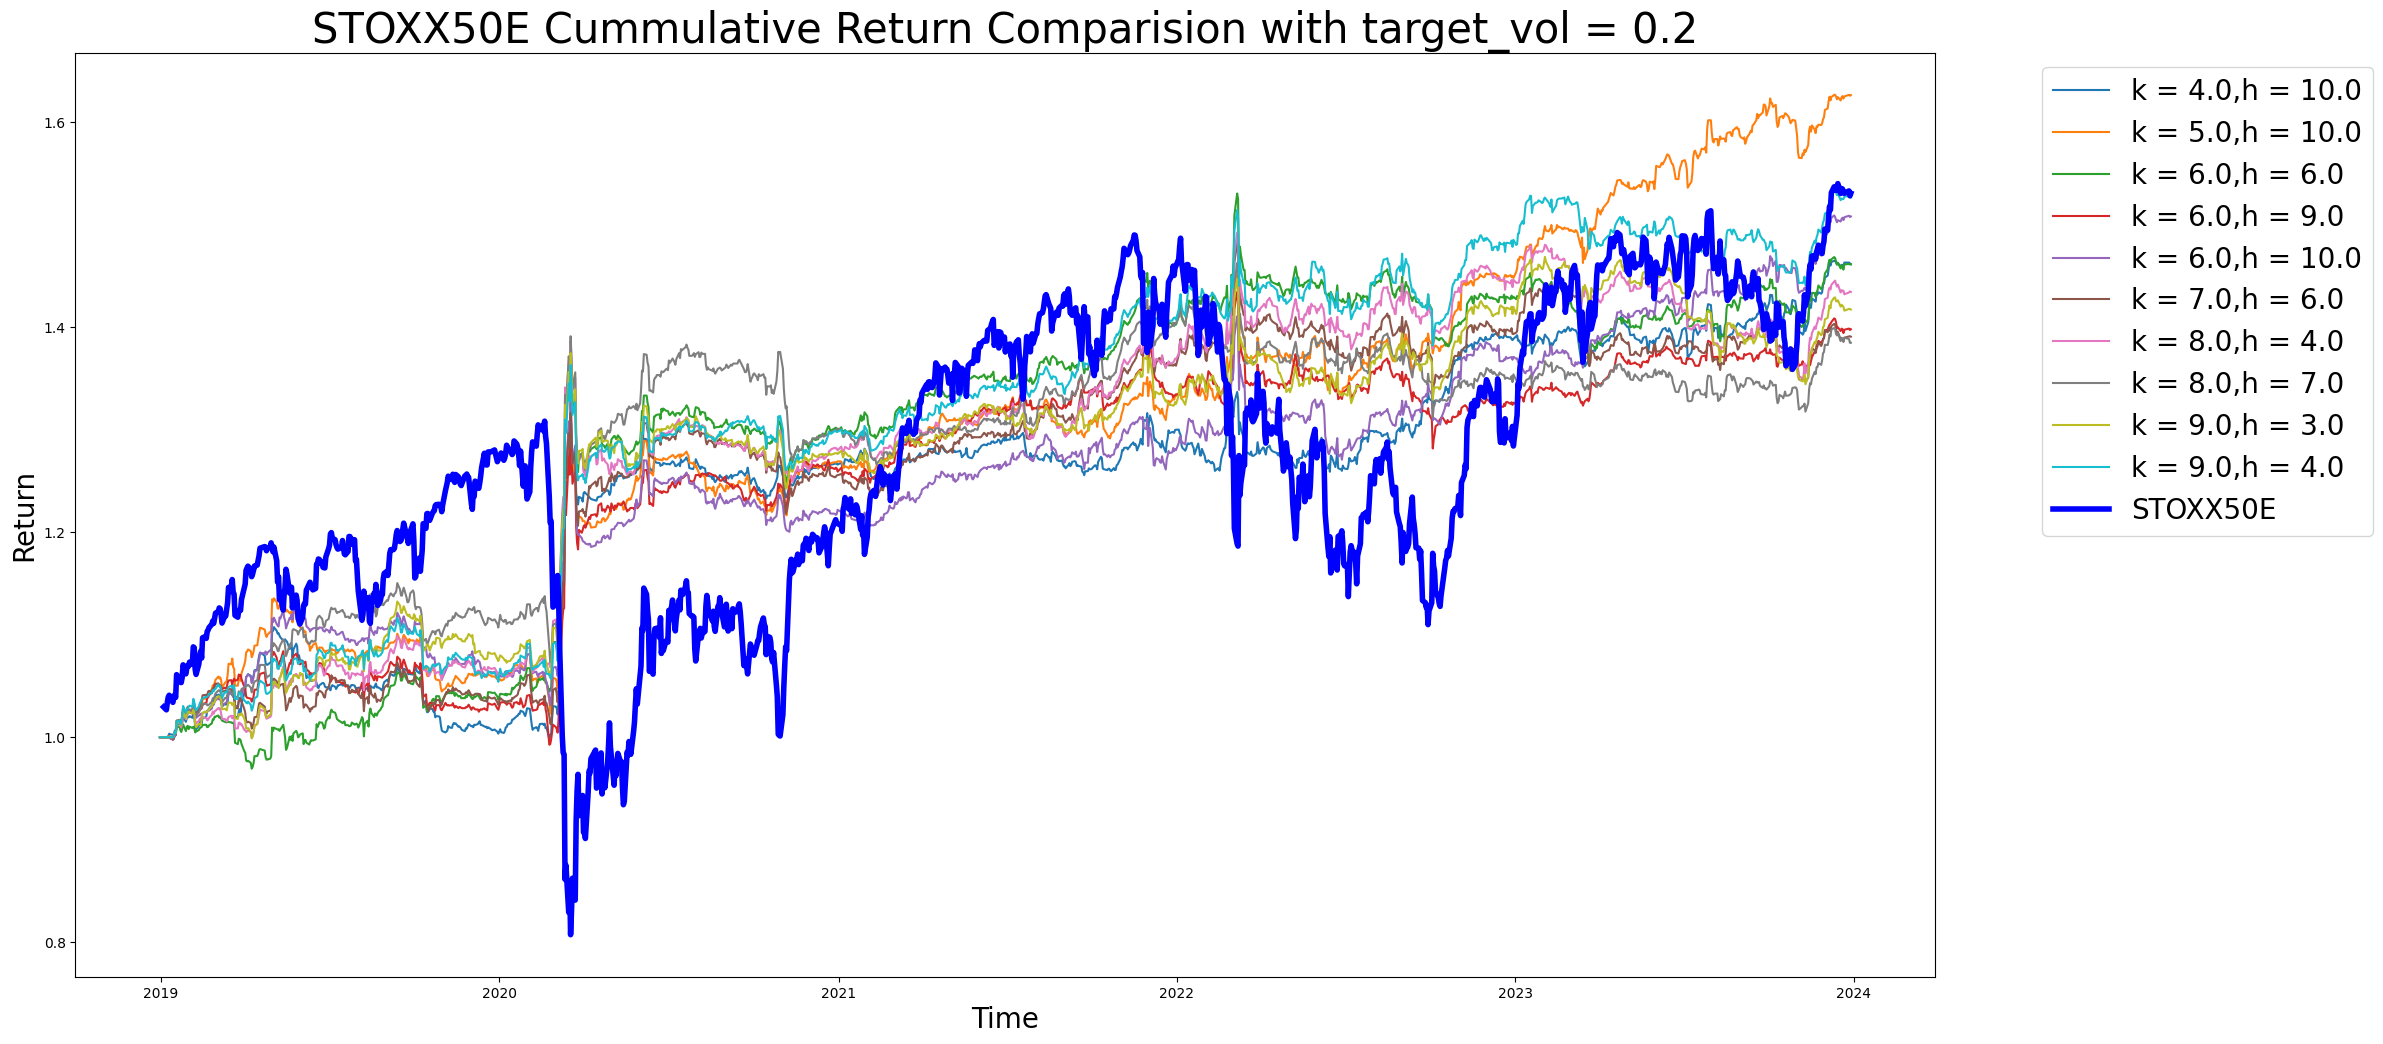

In [11]:
fig, ax = plt.subplots(figsize=(24, 12))

# by = ['2023-12-29 00:00:00']

benchmark = (EU_50+1).cumprod(axis = 1).loc['^STOXX50E']

cummulative_return = ((df.iloc[:,2:] + 1).cumprod(axis = 1)).reset_index(drop= True).sort_values(by = ['2023-12-29 00:00:00'], ascending = False)[:10]

cummulative_return.columns = pd.to_datetime(cummulative_return.columns)

for x in range(0,100):
    try:
        ax.plot(cummulative_return.loc[x], label = "k = " +str(df.loc[x]['k']) + ",h = "+ str(df.loc[x]['h']))
        ax.legend()
    except: pass

ax.xaxis.set_major_locator(mdates.YearLocator())

ax.plot(benchmark, color = 'Blue', linewidth = 4., label = 'STOXX50E')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 20)

ax.set_xlabel("Time", fontsize = 20)
ax.set_ylabel("Return", fontsize = 20)


plt.title('STOXX50E Cummulative Return Comparision with target_vol = 0.2', fontsize = 30)
plt.show()


In [12]:
df_benchmark = pd.DataFrame()

# df_benchmark['model'] = [x[6:] if x != 'classic_TSMOM' else x for x in df['Model']]

df_benchmark['k'] = df['k']
df_benchmark['h'] = df['h']

df_benchmark['cum_return'] = cummulative_returning(df)
df_benchmark['model_vs_index']= (cummulative_returning(df) / float((EU_50+1).cumprod(axis = 1).iloc[:,-1]) - 1)*100               
df_benchmark['annual_return'] = annualise_return(df)
df_benchmark['sharpe_ratio'] =  sharpe_ratio(df)
df_benchmark['max_drawdown'] = maximum_drawdown(df)

df_benchmark['calmar_ratio'] = calmar_ratio(df)
df_benchmark['sortino_ratio'] = sortino_ratio(df)

df_benchmark

C:\Users\hungl\AppData\Local\Temp\ipykernel_14560\2150275648.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_benchmark['model_vs_index']= (cummulative_returning(df) / float((EU_50+1).cumprod(axis = 1).iloc[:,-1]) - 1)*100
C:\Users\hungl\AppData\Local\Temp\ipykernel_14560\1242108724.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[k] = 0.0
C:\Users\hungl\AppData\Local\Temp\ipykernel_14560\1242108724.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[

,k,h,cum_return,model_vs_index,annual_return,sharpe_ratio,max_drawdown,calmar_ratio,sortino_ratio
0,1.0,1.0,1.023098,-33.145937,0.148064,0.094911,-0.199931,0.740575,-0.460374
1,1.0,2.0,1.014010,-33.739772,0.147051,0.073851,-0.122757,1.197902,-0.453924
2,1.0,3.0,1.103856,-27.868838,0.156903,0.345059,-0.108727,1.443094,-0.407613
3,1.0,4.0,1.129006,-26.225435,0.159600,0.404933,-0.116570,1.369140,-0.424976
4,1.0,5.0,0.999556,-34.684255,0.145434,0.027652,-0.106254,1.368738,-0.407119
...,...,...,...,...,...,...,...,...,...
95,10.0,6.0,1.171996,-23.416221,0.164152,0.402573,-0.134419,1.221193,-0.416645
96,10.0,7.0,1.192790,-22.057452,0.166328,0.438098,-0.112338,1.480596,-0.406612
97,10.0,8.0,1.095733,-28.399635,0.156027,0.248057,-0.170313,0.916120,-0.412298
98,10.0,9.0,1.106884,-27.670952,0.157229,0.276693,-0.195968,0.802323,-0.410437


In [13]:
df_benchmark.to_csv("test.csv")

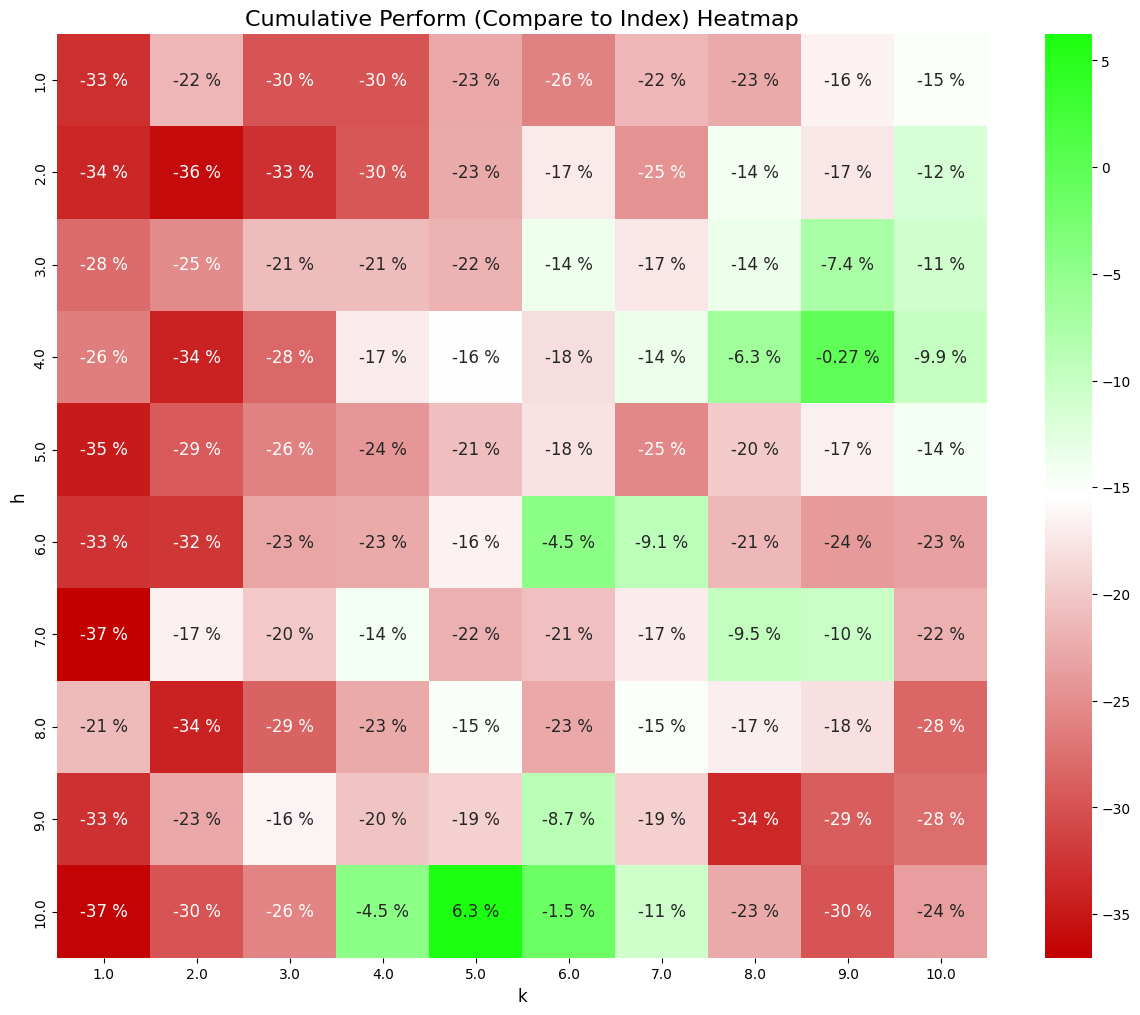

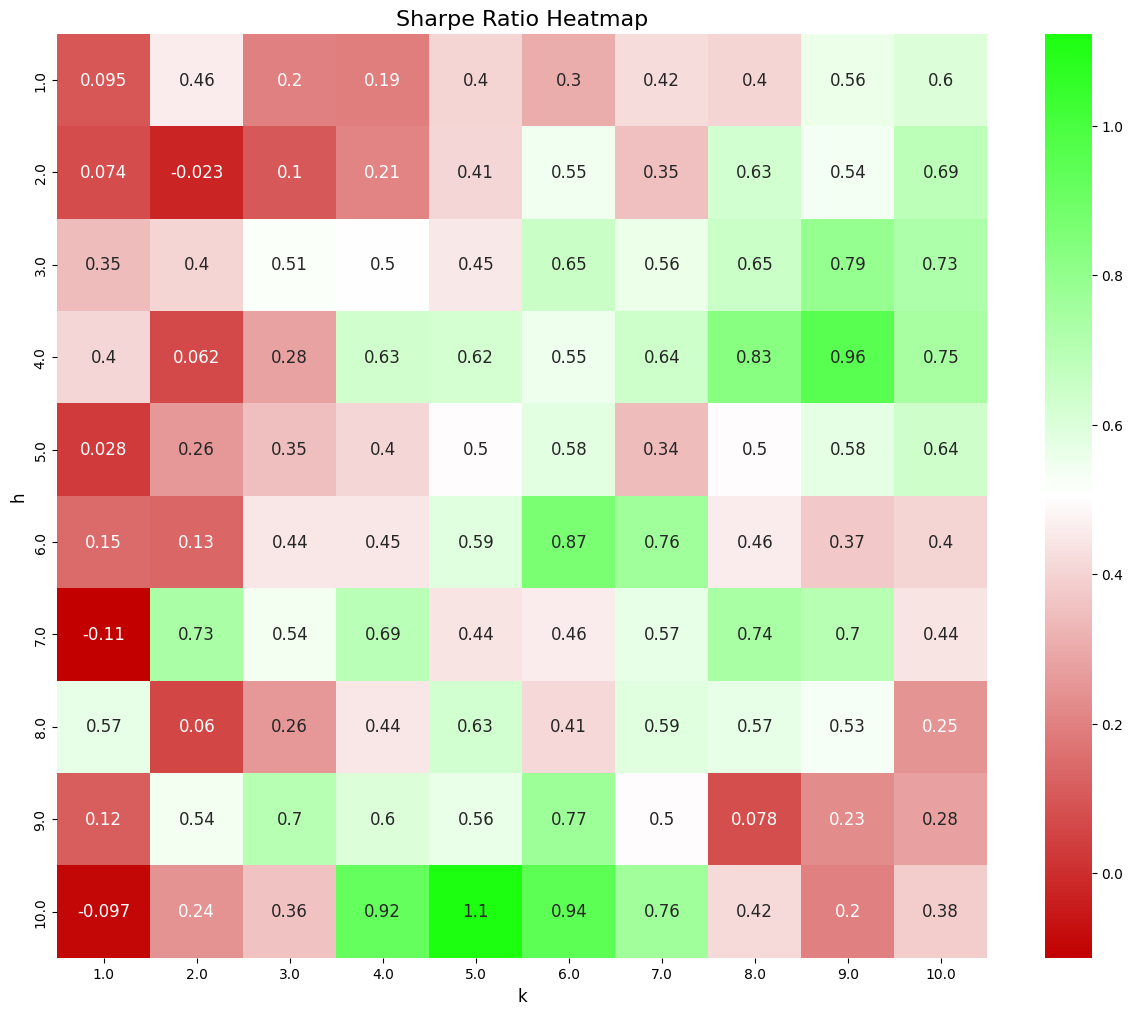

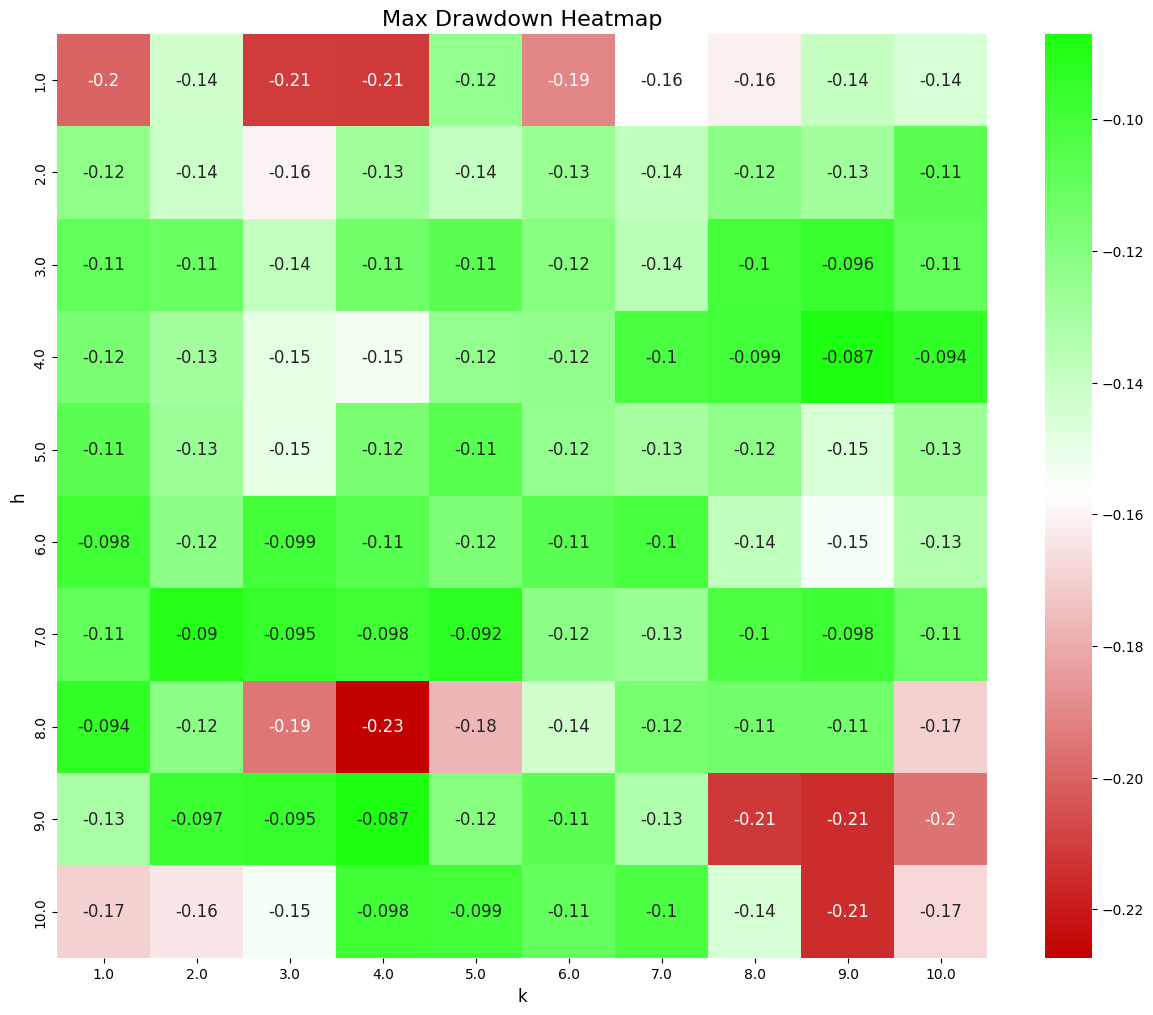

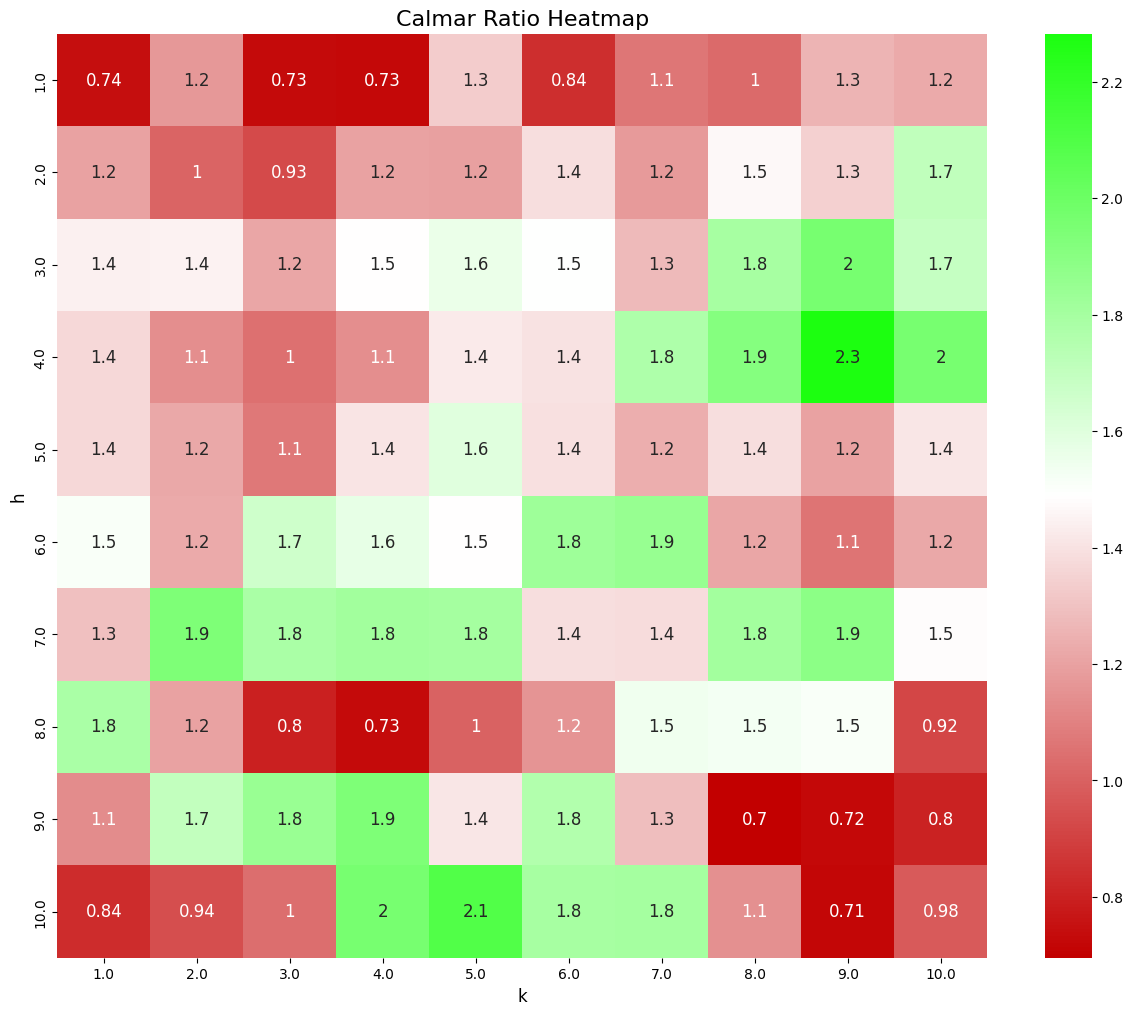

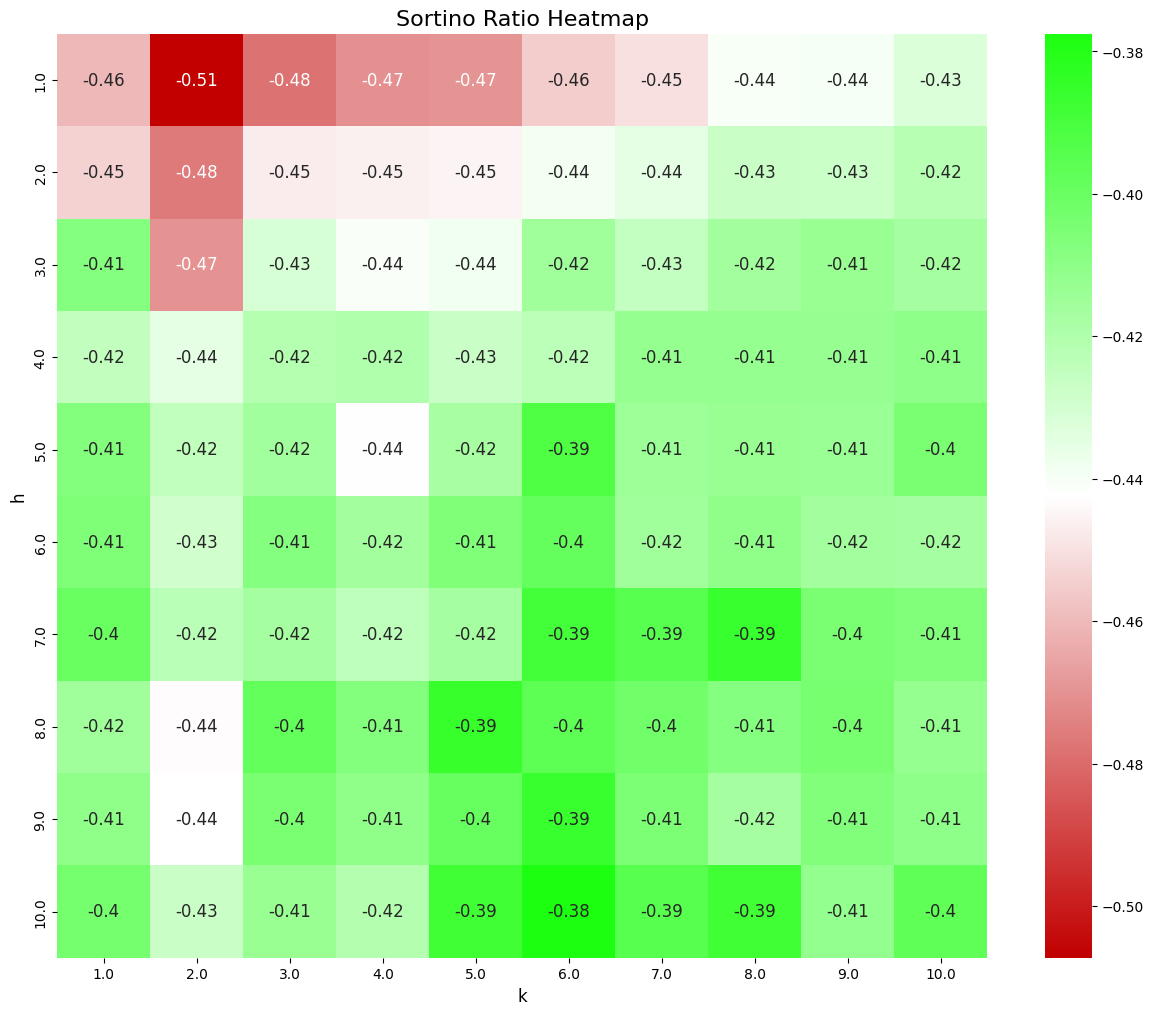

In [14]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

cum_return_df = df_benchmark.pivot(index = 'h', columns='k', values='model_vs_index')
annual_return_df = df_benchmark.pivot(index='h', columns='k', values='annual_return')
sharpe_ratio_df = df_benchmark.pivot(index='h', columns='k', values='sharpe_ratio')
max_drawdown_df = df_benchmark.pivot(index='h', columns='k', values='max_drawdown')
calmar_ratio_df = df_benchmark.pivot(index='h', columns='k', values='calmar_ratio')
sortino_ratio_df = df_benchmark.pivot(index='h', columns='k', values='sortino_ratio')

# Define a function to create heatmaps
def create_heatmap(df, metric_name):

    colors = ["#C20000", "#FFFFFF","#1CFF10"]  # Define custom colors
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors) 
    
    plt.figure(figsize=(15, 12))  # Larger figure size for width and height
    ax = sns.heatmap(df, annot=True, cmap= custom_cmap,  # Adjust annotation size
                annot_kws = {'size': 12})  # Larger annotation size
    if "Cumulative" in metric_name:
        for t in ax.texts: t.set_text(t.get_text() + " %")
    plt.title(f'{metric_name} Heatmap', fontsize=16)  # Larger title
    plt.xlabel('k', fontsize=12)  # Larger x-axis label
    plt.ylabel('h', fontsize=12)  # Larger y-axis label

    plt.show()

# Create heatmaps for each metric
create_heatmap(cum_return_df, 'Cumulative Perform (Compare to Index)')
create_heatmap(sharpe_ratio_df, 'Sharpe Ratio')
create_heatmap(max_drawdown_df, 'Max Drawdown')
create_heatmap(calmar_ratio_df, 'Calmar Ratio')
create_heatmap(sortino_ratio_df, 'Sortino Ratio')

In [15]:
# winrate_ = stats.pivot(index = 'h', columns='k', values='winrate')
# create_heatmap(winrate_, "Winrate Comparision")

* Các cặp (k,h) sẽ luôn outperform bất kể là target_vol như nào đi chăng nữa
* target_vol càng to -> cummulative return càng tốt nhưng calmar ratio sẽ nhỏ, và ngược lại
* Kết quả nằm ở khoảng giữa khi mà không có target_vol